Copyright (c) 2017 Felipe Mallea

https://github.com/llipe/machine-learning

# Implementación de un Clasificador Perceptron

Partimos con la implementación del perceptron en una clase independiente que luego entrenaremos. Para este ejemplo me basé en la implementación de Sebastian Raschka en el libro "Python Machine Learning".

In [1]:
import numpy as np

class Perceptron:
    """Clasificador Perceptron basado en la descripción del libro
    "Python Machine Learning" de Sebastian Raschka.

    Parametros
    ----------

    eta: float
        Tasa de aprendizaje.
    n_iter: int
        Pasadas sobre el dataset.

    Atributos
    ---------
    w_: array-1d
        Pesos actualizados después del ajuste
    errors_: list
        Cantidad de errores de clasificación en cada pasada

    """
    def __init__(self, eta=0.1, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Ajustar datos de entrenamiento

        Parámetros
        ----------
        X:  array like, forma = [n_samples, n_features]
            Vectores de entrenamiento donde n_samples es el número de muestras y
            n_features es el número de carácteristicas de cada muestra.
        y:  array-like, forma = [n_samples].
            Valores de destino

        Returns
        -------
        self:   object
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def predict(self, X):
        """Devolver clase usando función escalón de Heaviside.
        phi(z) = 1 si z >= theta; -1 en otro caso
        """
        phi = np.where(self.net_input(X) >= 0.0, 1, -1)
        return phi

    def net_input(self, X):
        """Calcular el valor z (net input)"""
        # z = w · x + theta
        z = np.dot(X, self.w_[1:]) + self.w_[0]
        return z

Ahora importaremos el dataset. En este caso usaremos Iris, que contiene información de flores (largo de pétalo, sépalo, especie, etc.). Pueden leer más en [wikipedia](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos) y descargarlo desde este link:
https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data. Yo ya tengo descargado el dataset en la carpeta datasets de este mismo repositorio (también pueden verlo ahí)

In [29]:
import pandas as pd

df = pd.read_csv("../datasets/iris.data", header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Para este ejemplo, vamos a trabajar con las setosas y las versicolor. Nos preocupamos por las virginicas porque ese tipo va de la fila 101-150 y nosotros solo seleccionamos las primeras 100.

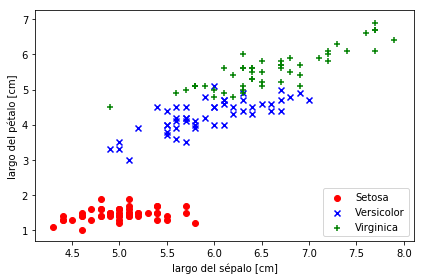

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

X_all = df.iloc[:,[0,2]].values

plt.scatter(X_all[:50, 0], X_all[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X_all[50:100, 0], X_all[50:100, 1], color='blue', marker='x', label='Versicolor')
plt.scatter(X_all[100:150, 0], X_all[100:150, 1], color='green', marker='+', label='Virginica')

plt.xlabel('largo del sépalo [cm]')
plt.ylabel('largo del pétalo [cm]')
plt.legend(loc='lower right')

plt.tight_layout()
#plt.savefig('../images/iris_dataset_alltypes.png', dpi=300)
plt.show()

Si se fijan, las flores Virgínicas no son linealmente separables con las Versicolor solo usando el largo del sépalo y el largo del pétalo. Sin embargo, esando estas mismas carácterísticas, las Virgínicas y las Versicolor son separables de las Setosas.

En el siguiente gráfico solo veremos las Versicolor y las Setosas.

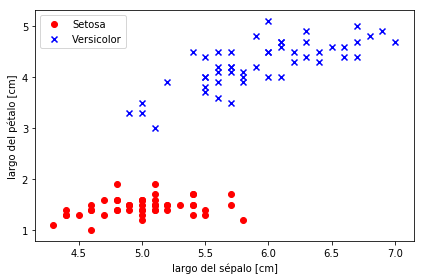

In [8]:
# extraemos el largo sepal y el largo del pétalo en las columnas 0 y 2. Usaremos solo Setosa y Versicolor
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='Versicolor')

plt.xlabel('largo del sépalo [cm]')
plt.ylabel('largo del pétalo [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('../images/classifier_perceptron.png', dpi=300)
plt.show()

[2, 2, 3, 2, 1, 0, 0, 0, 0, 0]


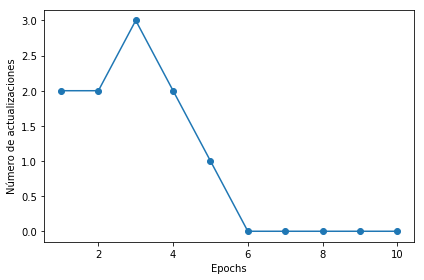

In [10]:
# selecccionar Setosa y Versicolor. 
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Número de actualizaciones')

plt.tight_layout()
# plt.savefig('../images/perceptron_1.png', dpi=300)
plt.show()

Tomando esto, el modelo entrenado quedaría de la siguiente forma:

In [24]:
print("Theta: " + str(ppn.w_[0]))
print("W: " + str(ppn.w_[1:]))
print("X: [Largo sépalo, Largo pétalo]")
print("z = W · X")
print("phi(z) = 1 si z >= theta; -1 c.o.c")

Theta: -0.4
W: [-0.68  1.82]
X: [Largo sépalo, Largo pétalo]
z = W · X
phi(z) = 1 si z >= theta; -1 c.o.c


Ahora para mostrar cómo quedaría la recta que separa/clasifica cada dato...

In [25]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

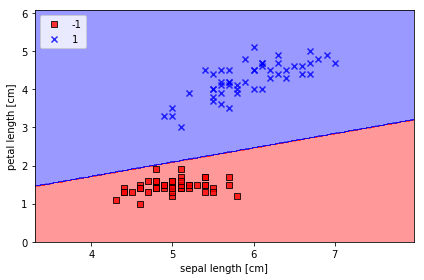

In [26]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('../images/perceptron_2.png', dpi=300)
plt.show()